# COVID TIMELINE
코로나 TIMELINE

코로나가 시작된 시점부터 확진자 및 증가율 추이
한국 경제 상황
항공 이용객 수 등 종합적으로 파악할 수 있는 타임라인 제작

In [1]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rc('font', family='NanumGothic')

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

## 1. Week 2 - 국가별 입국 금지 여부에 따른 항공편 수 추이

Week2에서 단순히 국가나 대륙별 항공편 수 추이만 확인했다.
Week3에서는 입국금지 국가를 크롤링해서 분류해서 확인했다.
입국금지 여부는 대한항공 사이트에서 크롤링했다.

### 1-1. 입국금지 국가 크롤링 과정

In [4]:
url = "https://www.koreanair.com/korea/ko/2020_02_TSA_detail.html"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, "html.parser")
prohibit = soup.find_all(class_ = "th_row_style" )

In [5]:
prohibit[0]

<th class="th_row_style" style="text-align: center; vertical-align: middle;" width="10%"><b>대한민국</b></th>

In [6]:
area = []
for item in prohibit:
    a = str(item.find('b'))
    a = re.sub('<.+?>', '', a, 0).strip()
    b = str(item.find('strong'))
    b = re.sub('<.+?>', '', b, 0).strip()
    area.append(a)
    area.append(b)

In [7]:
## 입국금지 국가 확인
area

['대한민국',
 'None',
 '대만',
 'None',
 '몽골',
 'None',
 'None',
 '일본',
 '중국',
 'None',
 '홍콩',
 'None',
 '네팔',
 'None',
 '말레이시아',
 'None',
 '몰디브',
 'None',
 'None',
 '미얀마',
 '베트남',
 'None',
 '스리랑카',
 'None',
 '싱가포르',
 'None',
 '인도',
 'None',
 '인도네시아',
 'None',
 '캄보디아',
 'None',
 'None',
 '태국',
 '필리핀',
 'None',
 '뉴질랜드',
 'None',
 '러시아',
 'None',
 'None',
 '미국',
 '아랍에미리트',
 'None',
 '영국',
 'None',
 'None',
 '우즈베키스탄',
 'None',
 '유럽\n (EU 가입국)',
 '이스라엘',
 'None',
 'None',
 '캐나다',
 '크로아티아',
 'None',
 'None',
 '터키',
 'None',
 '호주']

### 1-2. 입국금지 여부에 따라 DataFrame 분류

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rc('font', family='NanumGothic')

flight = pd.read_csv('flight.csv', encoding= 'cp949')
passenger = pd.read_csv('passenger.csv', encoding= 'cp949')

international = pd.merge(flight, passenger, on =['month','country','region'])

In [9]:
international.head()

,Unnamed: 0_x,month,arrFlight,depFlight,flights,country,region,Unnamed: 0_y,arrival,departure,passenger
0,0,201911,17,18,35,네팔,기타,0,2428,2230,4658
1,1,201911,13,13,26,몰디브,기타,1,1520,1513,3033
2,2,201911,0,0,0,스리랑카,기타,2,789,1191,1980
3,3,201911,30,21,51,에티오피아,기타,3,1797,2183,3980
4,4,201911,60,60,120,인도,기타,4,9495,9528,19023


In [10]:
international['deny'] = international['country']

In [11]:
international.head()

,Unnamed: 0_x,month,arrFlight,depFlight,flights,country,region,Unnamed: 0_y,arrival,departure,passenger,deny
0,0,201911,17,18,35,네팔,기타,0,2428,2230,4658,네팔
1,1,201911,13,13,26,몰디브,기타,1,1520,1513,3033,몰디브
2,2,201911,0,0,0,스리랑카,기타,2,789,1191,1980,스리랑카
3,3,201911,30,21,51,에티오피아,기타,3,1797,2183,3980,에티오피아
4,4,201911,60,60,120,인도,기타,4,9495,9528,19023,인도


In [12]:
international = international.drop(['Unnamed: 0_x'], axis = 1)
international = international.drop(['Unnamed: 0_y'], axis = 1)

In [13]:
mapping = {"유럽" : 1}
international['deny'] = international['region'].map(mapping)

In [14]:
international['deny'] = international['deny'].fillna(0)

In [15]:
deny = international[international['country'].isin(area)]

In [16]:
deny['deny'] = 1

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [17]:
deny.head()

,month,arrFlight,depFlight,flights,country,region,arrival,departure,passenger,deny
0,201911,17,18,35,네팔,기타,2428,2230,4658,1
1,201911,13,13,26,몰디브,기타,1520,1513,3033,1
2,201911,0,0,0,스리랑카,기타,789,1191,1980,1
4,201911,60,60,120,인도,기타,9495,9528,19023,1
6,201911,34,34,68,뉴질랜드,대양주,7558,8011,15569,1


In [18]:
international = pd.merge(international,deny,on = ['month','arrFlight','depFlight','flights','country','region','arrival',
                                         'departure','passenger'], how = 'outer')

In [19]:
international.head()

,month,arrFlight,depFlight,flights,country,region,arrival,departure,passenger,deny_x,deny_y
0,201911,17,18,35,네팔,기타,2428,2230,4658,0.0,1.0
1,201911,13,13,26,몰디브,기타,1520,1513,3033,0.0,1.0
2,201911,0,0,0,스리랑카,기타,789,1191,1980,0.0,1.0
3,201911,30,21,51,에티오피아,기타,1797,2183,3980,0.0,NaN
4,201911,60,60,120,인도,기타,9495,9528,19023,0.0,1.0


In [20]:
international['deny'] = international['deny_x'] + international['deny_y']
international = international.drop(['deny_x'], axis = 1)
international = international.drop(['deny_y'], axis = 1)

In [21]:
international['deny'] = international['deny'].fillna(0)

In [22]:
international.head()

,month,arrFlight,depFlight,flights,country,region,arrival,departure,passenger,deny
0,201911,17,18,35,네팔,기타,2428,2230,4658,1.0
1,201911,13,13,26,몰디브,기타,1520,1513,3033,1.0
2,201911,0,0,0,스리랑카,기타,789,1191,1980,1.0
3,201911,30,21,51,에티오피아,기타,1797,2183,3980,0.0
4,201911,60,60,120,인도,기타,9495,9528,19023,1.0


In [23]:
deny = international[international['deny'] == 1]

In [24]:
allow = international[international['deny'] == 0]

### 1-3. 시각화
Week2 에서와 같이 대륙별로 묶어서 시각화했다.

#### 1-3-1. 항공편 기준 시각화
상 : 입국 금지 국가
하 : 입국 허용 국가

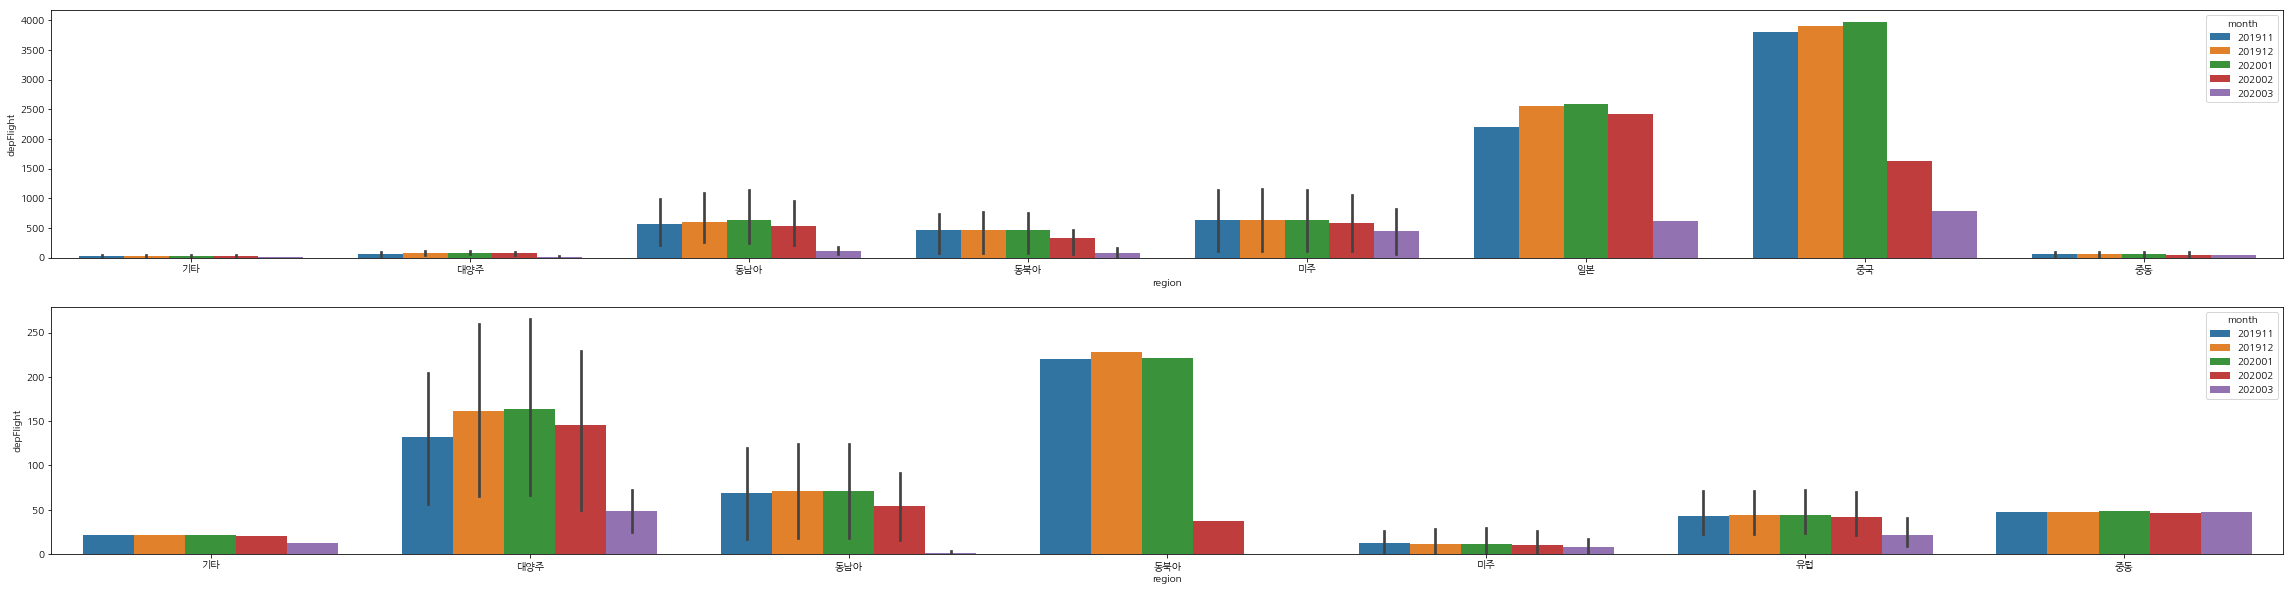

In [25]:
# 입국금지 vs 입국허용 국가의 인천 출발 기준 항공편수
fig, ax = plt.subplots(nrows=2)
fig.set_size_inches(40, 10)
sns.barplot(x='region', y= 'depFlight', hue='month', data=deny, ax = ax[0])
sns.barplot(x='region', y= 'depFlight', hue='month', data=allow, ax = ax[1])

#### 1-3-2. 승객 수 기준 시각화
상 : 입국 금지 국가
하 : 입국 허용 국가

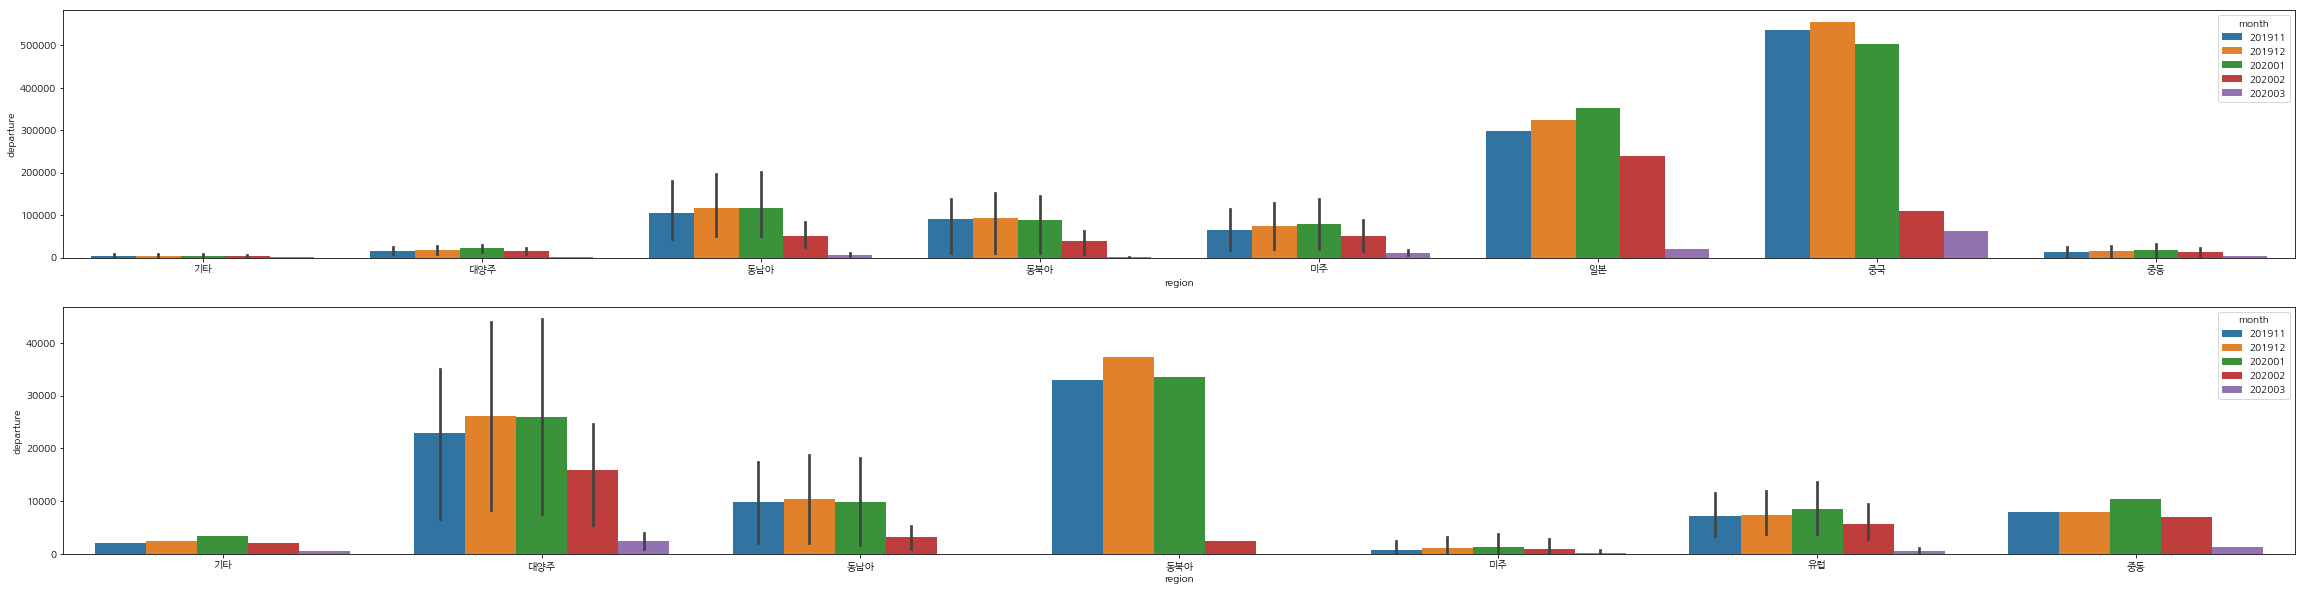

In [26]:
# 입국금지 vs 입국허용 국가의 인천 출발 기준 승객 수
fig, ax = plt.subplots(nrows=2)
fig.set_size_inches(40, 10)
sns.barplot(x='region', y= 'departure', hue='month', data=deny, ax = ax[0])
sns.barplot(x='region', y= 'departure', hue='month', data=allow, ax = ax[1])

### 1-4. 정리
입국 금지 여부와 관계없이 중동을 제외하고는 모두 항공편 수를 감축했다.
그리고 해당 국가로 출국하는 승객 수는 전체적으로 줄었다.

## 2. 일간 확진자 증가율 확인

1월 20일 : 주의 - 국내 첫 확진
1월 27일 : 경계
2월 23일 : 심각
2월 28일 : 사회적 거리두기
3월 02일 : 공적 마스크
3월 03일 : 드라이브 스루 시행
3월 09일 : 마스크 5부제 시행


In [27]:
time = pd.read_csv('Time.csv')

In [28]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
5,2020-01-25,16,27,25,2,0,0
6,2020-01-26,16,51,47,3,0,0
7,2020-01-27,16,61,56,4,0,0
8,2020-01-28,16,116,97,4,0,0
9,2020-01-29,16,187,155,4,0,0


In [29]:
# 일일 신규 확진자, 확진자 증가율, 증가율 추세 column 추가
x_time = time['date'].str[6]+'-'+ time['date'].str[-2:]

day_confirmed = np.zeros(len(time.date))
confirmed_rate = np.zeros(len(time.date))
rate_trend = np.zeros(len(time.date))

for i in np.arange(1,len(time.date)):
    day_confirmed[i] =  (time.confirmed[i] - time.confirmed[i-1])
time['day_confirmed'] = day_confirmed

for i in np.arange(1,len(time.date)):
    confirmed_rate[i] = (time.confirmed[i] - time.confirmed[i-1])/time.confirmed[i] *100
time['confirmed_rate'] = confirmed_rate
  
for i in np.arange(1,len(time.date)):    
    rate_trend[i] = (time.confirmed_rate[i] - time.confirmed_rate[i-1])/time.confirmed_rate[i]*100
time['rate_trend'] = rate_trend

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

divide by zero encountered in double_scalars



In [30]:
time['rate_trend'] = time['rate_trend'].fillna(0)
time['rate_trend'] = time['rate_trend'].replace([-np.inf], 0)

### 2-1. 일일 신규 확진자 확인

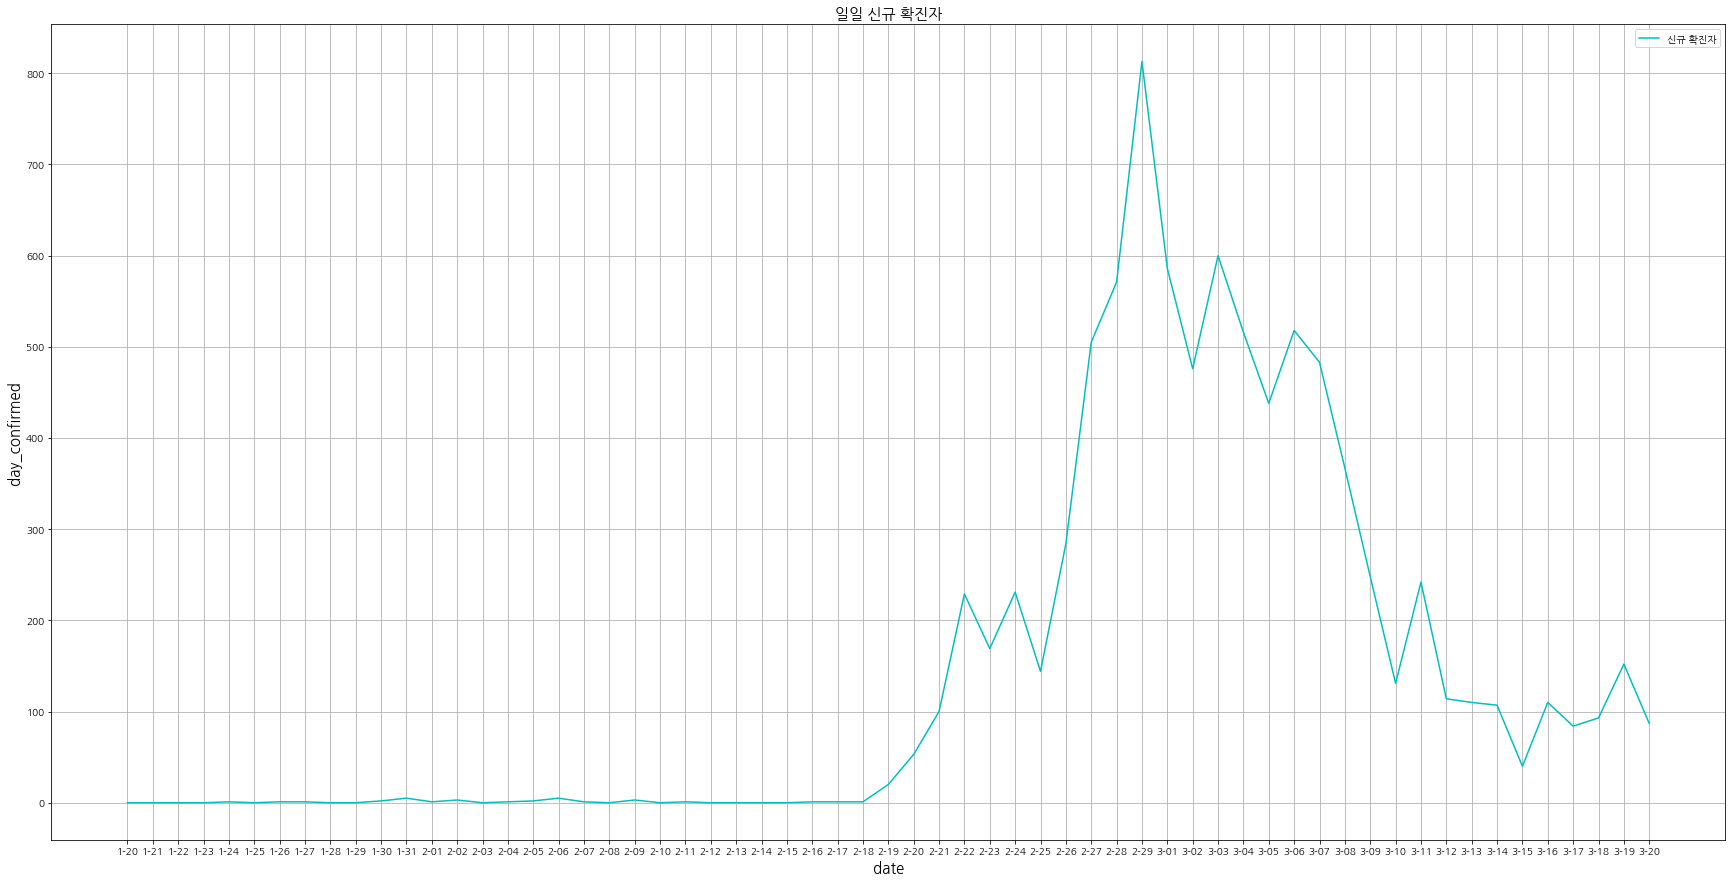

In [31]:
plt.figure(figsize=(30,15))
plt.plot(x_time, time.day_confirmed, 'c')
plt.xlabel('date', size=15)
plt.ylabel('day_confirmed', size=15)
plt.title('일일 신규 확진자', size=15)
plt.legend(['신규 확진자'])

plt.grid(True)

### 2-2. 일일 신규 확진자 증가율 확인
확진자 증가에 대해 미분해서 증가율을 확인했다.

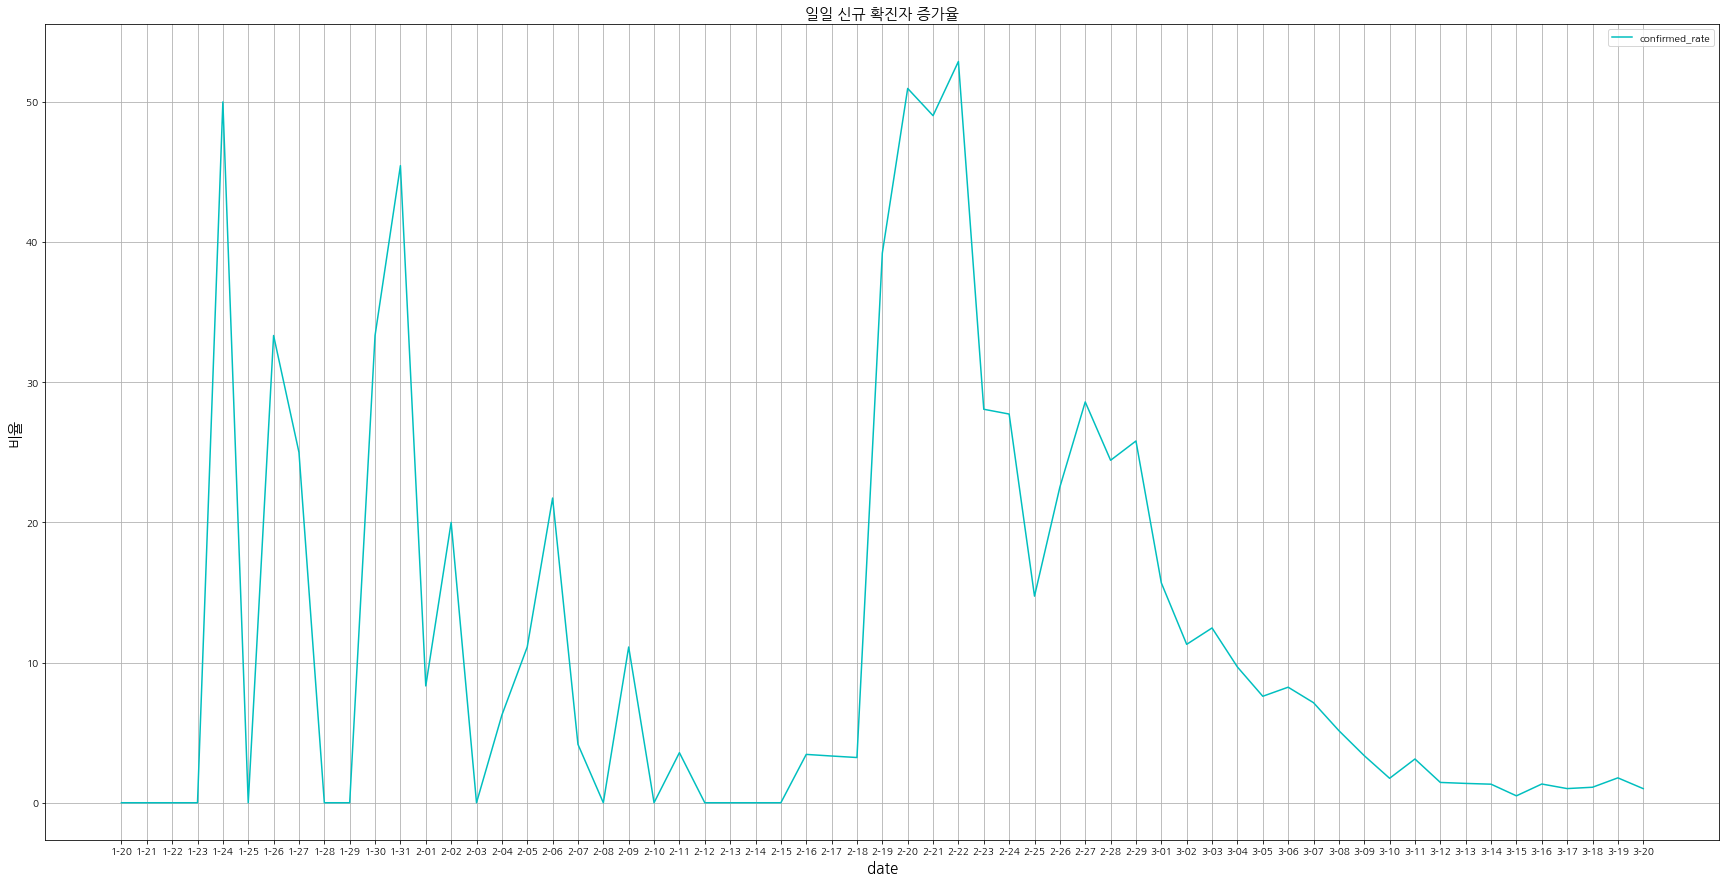

In [32]:
plt.figure(figsize=(30,15))
plt.plot(x_time, time.confirmed_rate, 'c')
plt.xlabel('date', size=15)
plt.ylabel('비율', size=15)
plt.title('일일 신규 확진자 증가율', size=15)
plt.legend(['confirmed_rate'])

plt.grid(True)

### 2-3. 일간 확진자 증가율 추이 확인
증가율을 미분한 것을 한 번 더 미분해서 증가율의 추이를 확인했다.

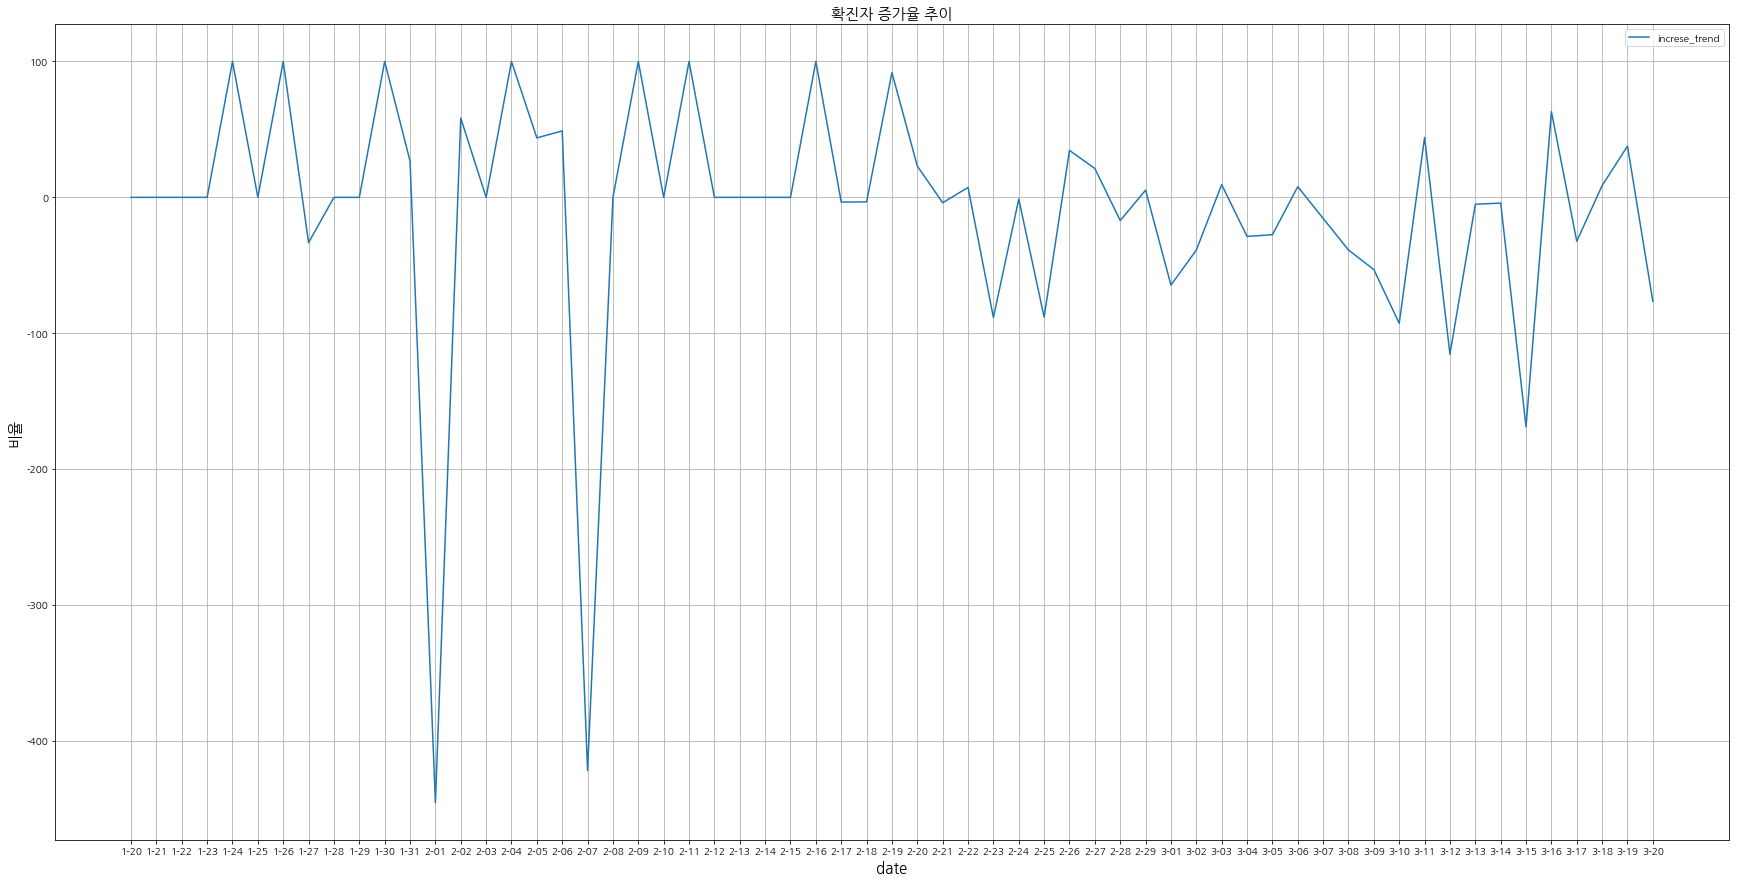

In [33]:
plt.figure(figsize=(30,15))
plt.plot(x_time, time.rate_trend)
plt.xlabel('date', size=15)
plt.ylabel('비율', size=15)
plt.title('확진자 증가율 추이', size=15)
plt.legend(['increse_trend'])

plt.grid(True)

### 2-4. 정리
위에 나타낸 것을 타임라인에 포함시킬 계획이다.

## 3. 확진 추세와 KOSPI의 관계
Week2 에서는 대한항공 주식을 가지고 왔다.

하지만, 너무 특정 주식을 바탕으로 경제 파악의 일반화를 하기에는 무리가 있다고 판단했다.

그래서 KOPSI지수를 활용해서 관계를 파악했다.

In [34]:
kospi = pd.read_csv("kospi.csv")

In [35]:
kospi.head()

,date,kospi,rate
0,2020/01/20,2262.64,0.54
1,2020/01/21,2239.69,-1.01
2,2020/01/22,2267.25,1.23
3,2020/01/23,2246.13,-0.93
4,2020/01/28,2176.72,-3.09


In [36]:
kospi["date"]=kospi["date"].str[:4]+"-"+kospi["date"].str[5:7]+"-"+kospi["date"].str[-2:]

In [37]:
time_kospi = pd.merge(time,kospi , on = 'date')

In [38]:
time_kospi

,date,time,test,negative,confirmed,released,deceased,day_confirmed,confirmed_rate,rate_trend,kospi,rate
0,2020-01-20,16,1,0,1,0,0,0.0,0.000000,0.000000,2262.64,0.54
1,2020-01-21,16,1,0,1,0,0,0.0,0.000000,0.000000,2239.69,-1.01
2,2020-01-22,16,4,3,1,0,0,0.0,0.000000,0.000000,2267.25,1.23
3,2020-01-23,16,22,21,1,0,0,0.0,0.000000,0.000000,2246.13,-0.93
4,2020-01-28,16,116,97,4,0,0,0.0,0.000000,0.000000,2176.72,-3.09
5,2020-01-29,16,187,155,4,0,0,0.0,0.000000,0.000000,2185.28,0.39
6,2020-01-30,16,246,199,6,0,0,2.0,33.333333,100.000000,2148.00,-1.71
7,2020-01-31,16,312,245,11,0,0,5.0,45.454545,26.666667,2119.01,-1.35
8,2020-02-03,16,490,414,15,0,0,0.0,0.000000,0.000000,2118.88,-0.01
9,2020-02-04,16,607,462,16,0,0,1.0,6.250000,100.000000,2157.90,1.84


### 3-1. 상관관계

#### 3-1-1. Heatmap

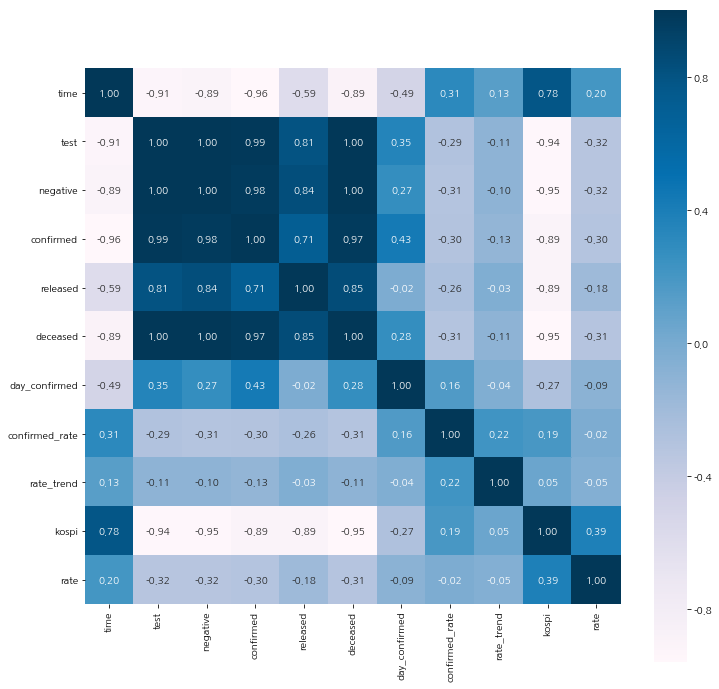

In [39]:
corr = time_kospi.corr()
plt.figure(figsize=(12,12))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True,
                         annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'PuBu')

#### 3-1-2. 산점도
사망자와 확진자를 기준으로 선형성을 확인했다.

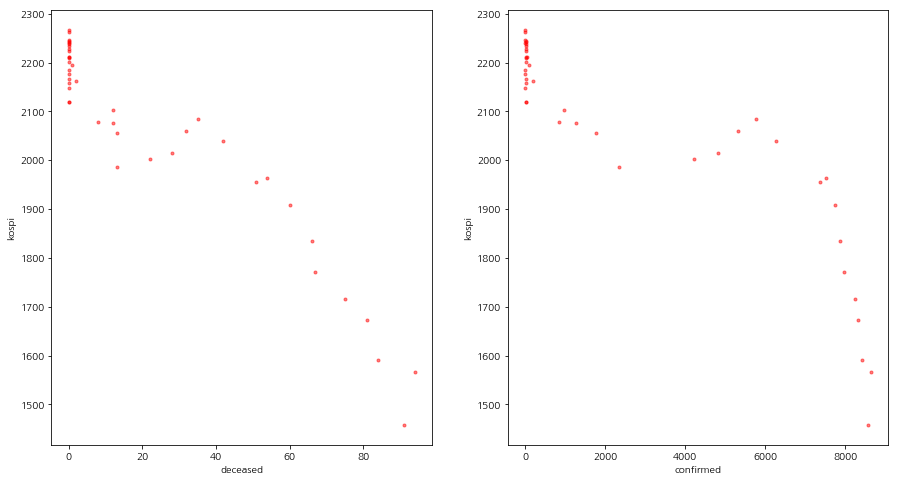

In [40]:
plt.figure(figsize = (15,8))
plt.subplot(1, 2, 1)
plt.plot('deceased', 'kospi', data=time_kospi, linestyle = 'none', marker = 'o',
         markersize = 3, color = 'red', alpha = 0.5)
plt.xlabel('deceased', fontsize = 10)
plt.ylabel('kospi', fontsize = 10)

plt.subplot(1, 2, 2)
plt.plot('confirmed', 'kospi', data=time_kospi, linestyle = 'none', marker = 'o',
         markersize = 3, color = 'red', alpha = 0.5)
plt.xlabel('confirmed', fontsize = 10)
plt.ylabel('kospi', fontsize = 10)
plt.show()

### 3-2. 정리
확인결과 코스피 지수는 검사자 수, 음성, 확진자, 사망자, 격리해제자 등 코로나 관련해서 음의 상관관계를 가졌다.

코로나로 인해 경제에 미치는 영향이 확실히 있음을 확인했다.

## 4. TIMELINE
제주공항 승객 수와 코로나 검색비율을 추가해서 TIMELINE 시각화를 한다.

In [41]:
jeju_passenger = pd.read_csv('jeju_passenger.csv', encoding= 'cp949')

In [42]:
search_trend = pd.read_csv('SearchTrend.csv')

In [46]:
search_trend = pd.merge(time, search_trend, on = 'date')

In [48]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()
df = time_kospi
df2 = jeju_passenger
df3 = search_trend
# Add traces
fig.add_trace(go.Scatter(
    x=kospi['date'],
    y=kospi['kospi'],
    name = 'kospi',
    text=kospi['kospi'],
    yaxis="y",
))

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['confirmed_rate'],
    name="confirmed_rate",
    text=df['confirmed_rate'],
    yaxis="y2",
))

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['day_confirmed'],
    name = 'day_confirmed',
    text=df['day_confirmed'],
    yaxis="y3",
))

fig.add_trace(go.Scatter(
    x=df2['date'],
    y=df2['passenger'],
    name = 'passenger',
    text=df2['passenger'],
    yaxis="y4",
))

fig.add_trace(go.Scatter(
    x=df3['date'],
    y=df3['coronavirus'],
    name = 'corona_search',
    text=df3['coronavirus'],
    yaxis="y5",
))

# style all the traces
fig.update_traces(
    hoverinfo="name+x+text",
    line={"width": 0.5},
    marker={"size": 8},
    mode="lines+markers",
    showlegend=False
)

# Add annotations
fig.update_layout(
    annotations=[
        dict(
            x="2020-01-20",
            y=0,
            arrowcolor="rgba(63, 81, 181, 0.2)",
            arrowsize=0.3,
            ax=0,
            ay=30,
            text="corona start",
            xref="x",
            yanchor="bottom",
            yref="y"
        ),
        dict(
            x="2020-02-28",
            y=0,
            arrowcolor="rgba(63, 81, 181, 0.2)",
            arrowsize=0.3,
            ax=0,
            ay=30,
            text="social distancing",
            xref="x",
            yanchor="bottom",
            yref="y"
        ),
        dict(
            x="2020-04-14",
            y=0,
            arrowcolor="rgba(76, 175, 80, 0.1)",
            arrowsize=0.3,
            ax=0,
            ay=30,
            text="today",
            xref="x",
            yanchor="bottom",
            yref="y"
        )
    ],
)

# Add shapes
fig.update_layout(
    shapes=[
        dict(
            fillcolor="rgba(63, 81, 181, 0.2)",
            line={"width": 0},
            type="rect",
            x0="2020-01-20",
            x1="2020-02-28",
            xref="x",
            y0=0,
            y1=1,
            yref="paper"
        ),
        dict(
            fillcolor="rgba(76, 175, 80, 0.1)",
            line={"width": 0},
            type="rect",
            x0="2020-02-28",
            x1="2020-04-14",
            xref="x",
            y0=0,
            y1=1,
            yref="paper"
        )
    ]
)

# Update axes
fig.update_layout(
    xaxis=dict(
        autorange=True,
        range=["2020-01-01 00:00:00.0001", "2020-04-20 00:00:00.0001"],
        rangeslider=dict(
            autorange=True,
            range=["2020-01-01 00:00:00.0001", "2020-04-20 00:00:00.0001"]
        ),
        type="date"
    ),
    yaxis=dict(
        anchor="x",
        autorange=True,
        domain=[0, 0.2],
        linecolor="#1DDB16",
        mirror=True,
        range=[0,2500],
        showline=True,
        side="right",
        tickfont={"color": "#1DDB16"},
        tickmode="auto",
        ticks="",
        title = 'kospi',
        titlefont={"color": "#1DDB16"},
        type="linear",
        zeroline=False
    ),
    yaxis2=dict(
        anchor="x",
        autorange=True,
        domain=[0.2, 0.4],
        linecolor="#0000FF",
        mirror=True,
        range=[-5,105],
        showline=True,
        side="right",
        tickfont={"color": "#0000FF"},
        tickmode="auto",
        ticks="",
        title = 'increase rate',
        titlefont={"color": "#0000FF"},
        type="linear",
        zeroline=False
    ),
    yaxis3=dict(
        anchor="x",
        autorange=True,
        domain=[0.4, 0.6],
        linecolor="#FF0000",
        mirror=True,
        range=[-100,15000],
        showline=True,
        side="right",
        tickfont={"color": "#FF0000"},
        tickmode="auto",
        ticks="",
        title = 'day confirmed',
        titlefont={"color": "#FF0000"},
        type="linear",
        zeroline=False
    ),
    yaxis4=dict(
        anchor="x",
        autorange=True,
        domain=[0.6, 0.8],
        linecolor="#FFBB00",
        mirror=True,
        range=[-100,50000],
        showline=True,
        side="right",
        tickfont={"color": "#FFBB00"},
        tickmode="auto",
        ticks="",
        title = 'passenger',
        titlefont={"color": "#FFBB00"},
        type="linear",
        zeroline=False
    ),
    yaxis5=dict(
        anchor="x",
        autorange=True,
        domain=[0.8, 1],
        linecolor="#FF007F",
        mirror=True,
        range=[-5,105],
        showline=True,
        side="right",
        tickfont={"color": "#FF007F"},
        tickmode="auto",
        ticks="",
        title = 'corona_search',
        titlefont={"color": "#FF007F"},
        type="linear",
        zeroline=False
    )
)

# Fig 설정 - x 기준 zoom 모드
fig.update_layout(
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=800,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
)

fig.show()

왼쪽 파란색이 코로나 시작부터 사회적 거리두기 이전

오른쪽 녹색이 사회적 거리두기 이후부터 현재까지이다.

*reference*
https://plotly.com/python/range-slider/